In [1]:
    import numpy as np
    import matplotlib.pyplot as plt
    import keras
    from keras.datasets import mnist
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.optimizers import Adam
    from keras.utils.np_utils import to_categorical
    from keras.models import Model
    from keras.layers import Flatten
    from keras.layers.convolutional import Conv2D
    from keras.layers.convolutional import MaxPooling2D
    from keras.layers import Dropout
    import random

Using TensorFlow backend.


In [2]:

    np.random.seed(0)

In [3]:
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
     
    print(X_train.shape)
    print(X_test.shape)

    assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
    assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
    assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
    assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28"


(60000, 28, 28)
(10000, 28, 28)


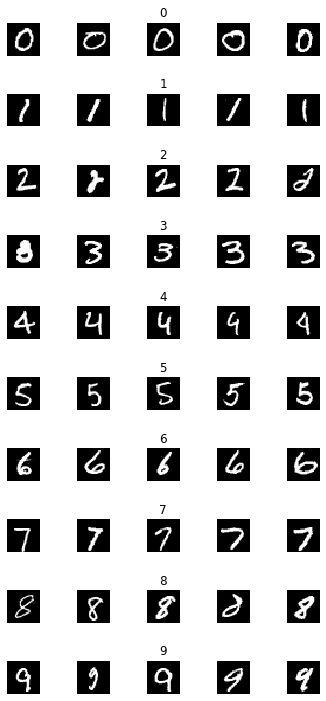

In [4]:
    num_of_samples=[]
     
    cols = 5
    num_classes = 10
     
    fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
    fig.tight_layout()
     
    for i in range(cols):
        for j in range(num_classes):
          x_selected = X_train[y_train == j]
          axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
          axs[j][i].axis("off")
          if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


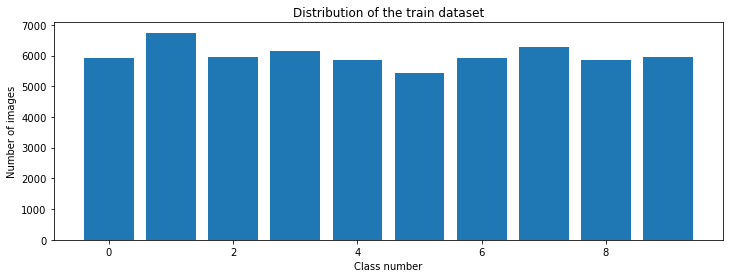

In [5]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [6]:
    X_train = X_train.reshape(60000, 28, 28, 1)
    X_test = X_test.reshape(10000, 28, 28, 1)

In [7]:
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
     
    X_train = X_train/255
    X_test = X_test/255

In [8]:
# define the leNet model function
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2,)))
    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
model = leNet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)              

In [10]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 25s 469us/step - loss: 0.2239 - accuracy: 0.9292 - val_loss: 0.0551 - val_accuracy: 0.9820
Epoch 2/10
54000/54000 [==============================] - 25s 463us/step - loss: 0.0680 - accuracy: 0.9793 - val_loss: 0.0437 - val_accuracy: 0.9877
Epoch 3/10
54000/54000 [==============================] - 25s 466us/step - loss: 0.0534 - accuracy: 0.9835 - val_loss: 0.0426 - val_accuracy: 0.9873
Epoch 4/10
54000/54000 [==============================] - 25s 465us/step - loss: 0.0486 - accuracy: 0.9855 - val_loss: 0.0372 - val_accuracy: 0.9890
Epoch 5/10
54000/54000 [==============================] - 25s 467us/step - loss: 0.0417 - accuracy: 0.9870 - val_loss: 0.0430 - val_accuracy: 0.9892
Epoch 6/10
54000/54000 [==============================] - 25s 468us/step - loss: 0.0422 - accuracy: 0.9871 - val_loss: 0.0369 - val_accuracy: 0.9895
Epoch 7/10
54000/54000 [==============================] -

Text(0.5, 0, 'epochs')

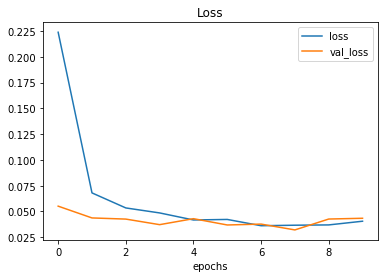

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

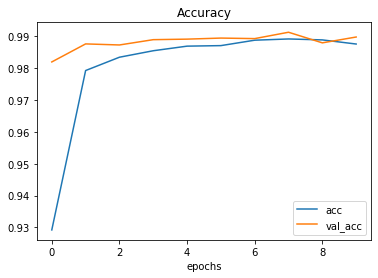

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')
plt.xlabel('epochs')

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.04188541992254322
Test accuracy: 0.9864000082015991


In [14]:
from PIL import Image
img = Image.open('./digit-2.png')
#plt.imshow(img)

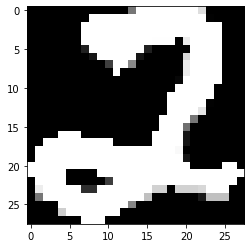

In [15]:
import cv2
img_array = np.asarray(img)
resized_img = cv2.resize(img_array, (28,28))
gray_scaled = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)
final_image = cv2.bitwise_not(gray_scaled)
plt.imshow(final_image, cmap=plt.get_cmap('gray'))
#print(final_image.shape)

In [16]:
final_image = final_image/255
final_image = final_image.reshape(1, 28, 28, 1)

In [17]:
prediction = model.predict_classes(final_image)
print('Predicted:', str(prediction))

Predicted: [2]
